<a href="https://colab.research.google.com/github/MohamedSameh410/Learning-Management-System/blob/main/Digits_recognition_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import models
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras import callbacks, regularizers

Loading the Dataset

In [201]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [202]:
print(train_data.info())
print('#'*50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


Normalization and Reshape

In [203]:
print("Train Shape:", train_data.shape)
print("Test Shape:",test_data.shape)

Train Shape: (42000, 785)
Test Shape: (28000, 784)


In [204]:
x_train = (train_data.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train_data.iloc[:,0].values.astype('int32') # only labels
x_test = test_data.values.astype('float32') # convert it and x_train to float to divide it by 255

In [205]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

x_train /= 255                              # normalize each value for each pixel for the entire vector for each input
x_test /= 255                               # make it in range form 0 to 1

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (42000, 28, 28)
Testing matrix shape (28000, 28, 28)


encode label

In [206]:
y_train = keras.utils.to_categorical(y_train, 10) #convert y_train to 10 classes

Train , Test split

In [207]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42) #42 in random_state to get the same output
print(x_train.shape)
print(x_val.shape)

(33600, 28, 28)
(8400, 28, 28)


In [208]:
print(y_train.shape)
print(y_val.shape)

(33600, 10)
(8400, 10)


ANN model

In [209]:
model=Sequential()
#first layer
model.add(keras.layers.Flatten(input_shape=(28,28))) #input layer's neuron will be 784
#second layer
model.add(Dense(128, activation='relu'))
#third layer
model.add(Dense(128, activation='relu'))
#final layer
model.add(Dense(10, activation='softmax'))

In [210]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               100480    
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


compile model

In [211]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#early_stopping_monitor = callbacks.EarlyStopping(patience=3)

In [212]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="Wights.h5",verbose=1,save_best_only=True)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, verbose=1, epochs=10,callbacks=[checkpoint])

Epoch 1/10
524/525 [============================>.] - ETA: 0s - loss: 0.3396 - accuracy: 0.9004
Epoch 1: val_loss improved from inf to 0.19502, saving model to Wights.h5
525/525 [==============================] - 6s 10ms/step - loss: 0.3392 - accuracy: 0.9005 - val_loss: 0.1950 - val_accuracy: 0.9423
Epoch 2/10
522/525 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9604
Epoch 2: val_loss improved from 0.19502 to 0.12504, saving model to Wights.h5
525/525 [==============================] - 5s 9ms/step - loss: 0.1321 - accuracy: 0.9604 - val_loss: 0.1250 - val_accuracy: 0.9631
Epoch 3/10
519/525 [============================>.] - ETA: 0s - loss: 0.0892 - accuracy: 0.9734
Epoch 3: val_loss improved from 0.12504 to 0.11523, saving model to Wights.h5
525/525 [==============================] - 5s 9ms/step - loss: 0.0890 - accuracy: 0.9735 - val_loss: 0.1152 - val_accuracy: 0.9635
Epoch 4/10
521/525 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy:

summarize

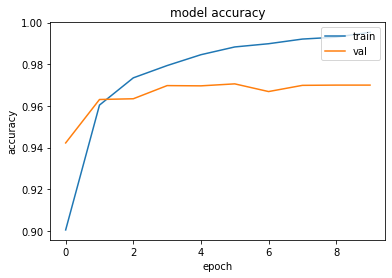

In [213]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

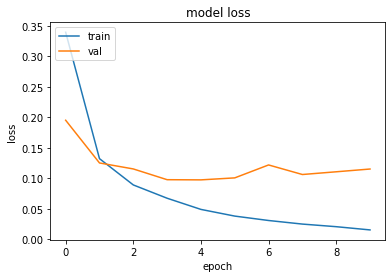

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluation

In [215]:
print(model.evaluate(x_val, y_val))
print(model.metrics_names)

263/263 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9700
[0.11510239541530609, 0.9700000286102295]
['loss', 'accuracy']


In [216]:
model = models.load_model('/content/Wights.h5')

prediction

875/875 [==============================] - 2s 2ms/step


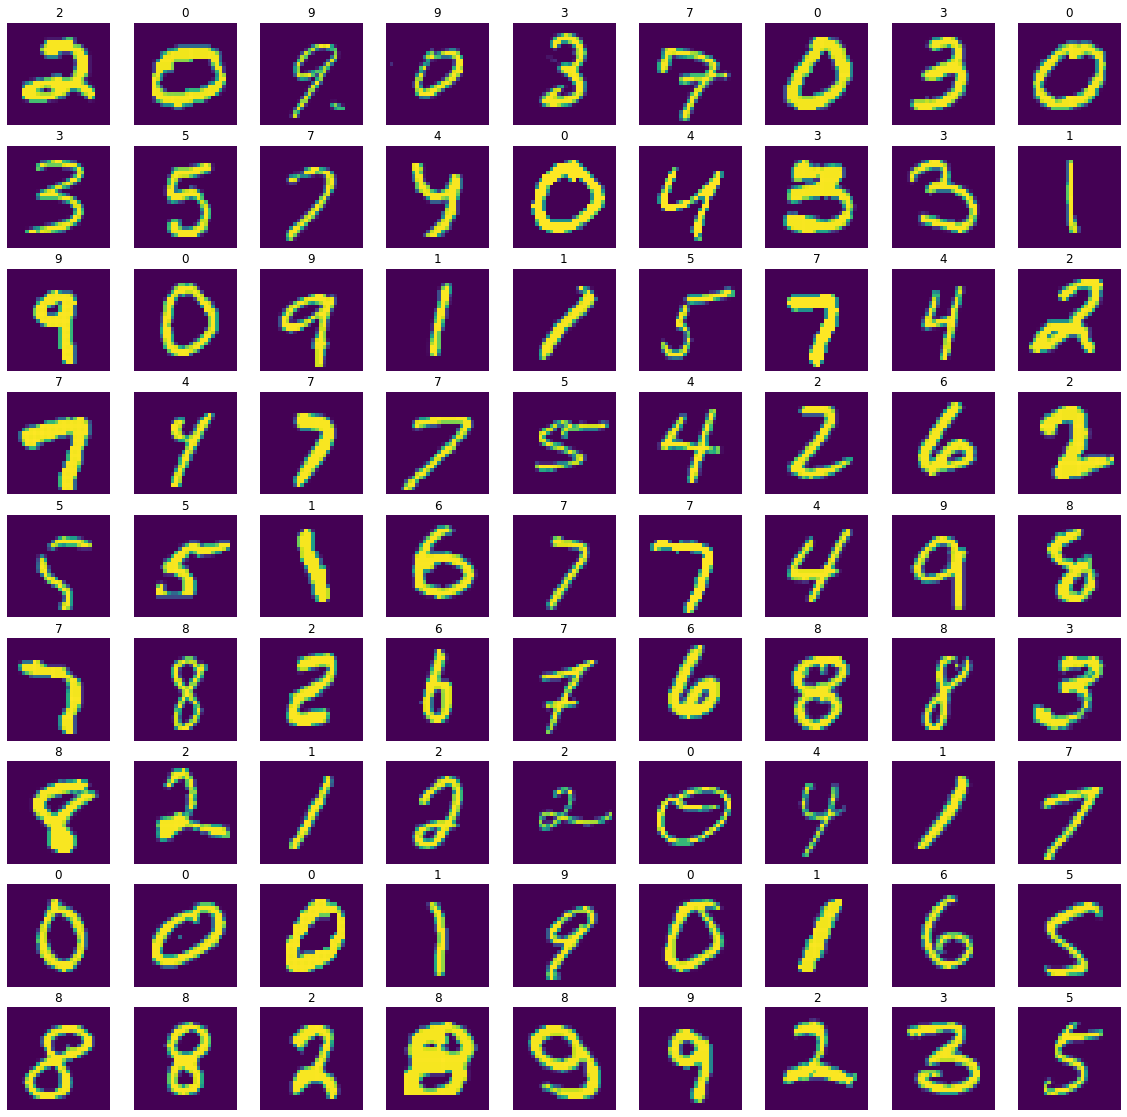

In [217]:
pred_imgs = test_data.to_numpy().reshape(-1,28,28)
raw_result = model.predict(pred_imgs)
label = np.argmax(raw_result,axis=1)

fig, ax = plt.subplots(9,9,figsize=(20,20))
for i in range(9):
    for j in range(9):
        ax[i][j].imshow(pred_imgs[9*i+j])
        ax[i][j].set_title(label[9*i+j])
        ax[i][j].axis('off')